In [151]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split 

#Models ML
from sklearn.svm import SVC

#metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [152]:
data = pd.read_csv('../diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [153]:
row, col = data.shape

print("Row = ", row)
print("Col =", col)

Row =  768
Col = 9


In [154]:
#There is not NAN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [155]:
data['Outcome'] = data['Outcome'].astype('bool')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [156]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [157]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [158]:
select_col_df = data[select_col]
select_col_df = select_col_df.describe()
select_col_df 

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [159]:
mean_value = select_col_df.iloc[1:2, :]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [160]:
mean_value = mean_value.values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [161]:
# Replacing the values equal to 0 by median

for col in data[select_col]:

    #print(col)

    data.loc[:, col].replace(0, data.loc[:, col].median(), inplace=True)

C:\Users\arjun\AppData\Local\Temp\ipykernel_17412\2730410973.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.loc[:, col].replace(0, data.loc[:, col].median(), inplace=True)
C:\Users\arjun\AppData\Local\Temp\ipykernel_17412\2730410973.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [162]:
#data

In [163]:
print(len(data[data['Outcome'] == 1]))
print(len(data[data['Outcome'] == 0]))

268
500


In [164]:
yes = data[data['Outcome'] == 1]
no = data[data['Outcome'] == 0].sample(frac = 1).iloc[0:268]
data = pd.concat([yes,no], axis = 0).sample(frac = 1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
47,2,71,70,27,30.5,28.0,0.586,22,False
386,5,116,74,29,30.5,32.3,0.660,35,True
643,4,90,72,23,30.5,28.0,0.610,31,False
695,7,142,90,24,480.0,30.4,0.128,43,True
365,5,99,54,28,83.0,34.0,0.499,30,False
...,...,...,...,...,...,...,...,...,...
170,6,102,82,23,30.5,30.8,0.180,36,True
599,1,109,38,18,120.0,23.1,0.407,26,False
152,9,156,86,28,155.0,34.3,1.189,42,True
714,3,102,74,23,30.5,29.5,0.121,32,False


In [165]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.052239,125.440299,72.998134,27.977612,100.754664,33.280224,0.492935,33.533582
std,3.486298,31.626562,12.329510,9.205822,112.675881,6.875446,0.351641,11.017691
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,101.000000,65.750000,23.000000,30.500000,28.775000,0.245000,24.750000
50%,3.000000,121.000000,72.000000,24.000000,38.000000,32.800000,0.394500,30.500000
75%,6.000000,146.250000,80.000000,33.000000,135.000000,37.125000,0.652000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [166]:
data1 = data.iloc[:, :-1]

In [167]:
cor = data1.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.106472,0.170027,0.020304,-0.054362,0.019413,-0.043434,0.548328
Glucose,0.106472,1.000000,0.215942,0.172962,0.347511,0.227833,0.149293,0.273826
BloodPressure,0.170027,0.215942,1.000000,0.152673,-0.035102,0.283023,0.008146,0.326691
SkinThickness,0.020304,0.172962,0.152673,1.000000,0.238187,0.509107,0.177549,0.061117
Insulin,-0.054362,0.347511,-0.035102,0.238187,1.000000,0.157576,0.187134,0.009968
BMI,0.019413,0.227833,0.283023,0.509107,0.157576,1.000000,0.163170,0.043224
DiabetesPedigreeFunction,-0.043434,0.149293,0.008146,0.177549,0.187134,0.163170,1.000000,0.006595
Age,0.548328,0.273826,0.326691,0.061117,0.009968,0.043224,0.006595,1.000000


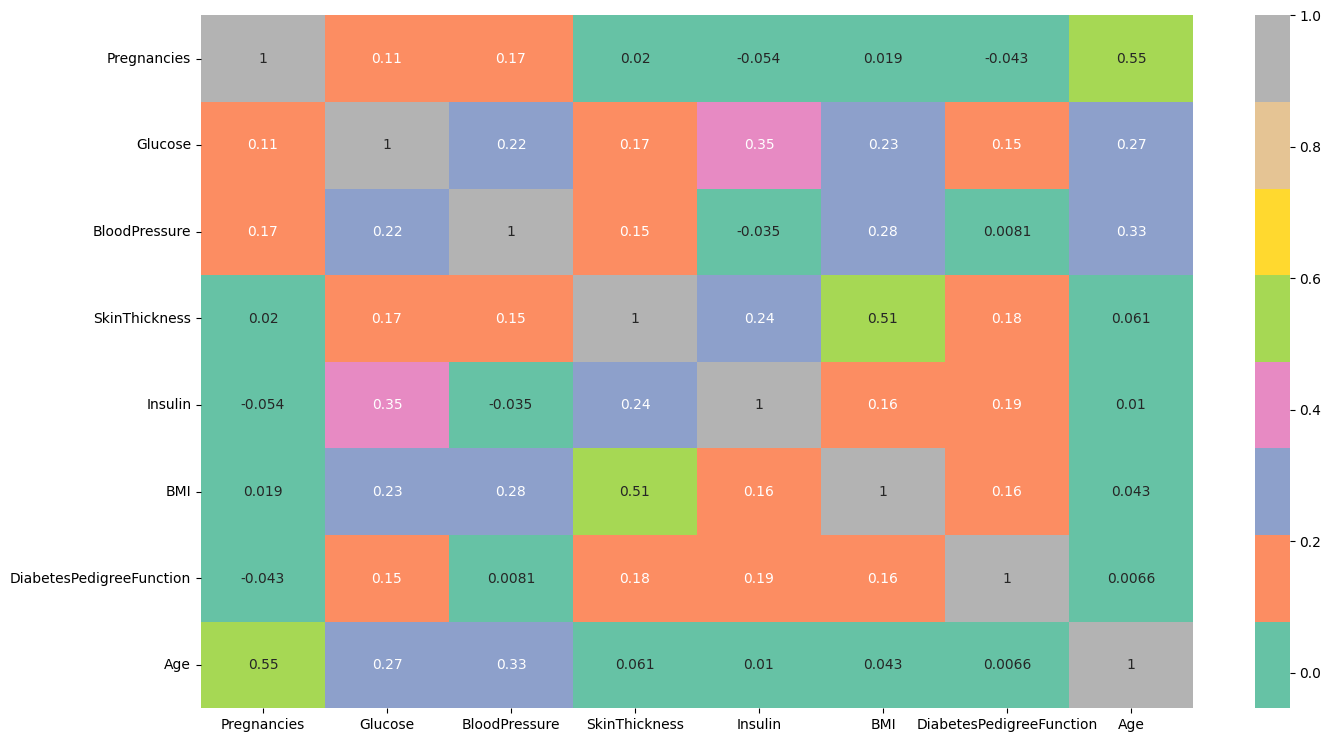

In [168]:
plt.figure(figsize=(16,9))
sns.heatmap(cor, annot=True, cmap='Set2')
plt.show()

In [169]:
#training and normalzation of data

x = data.iloc[:, :8]
y = data.iloc[:, 8:].astype('int')

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=1)

In [170]:
svc = SVC()

svc_model = svc.fit(x_train, y_train)

C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
131,9,122,56,23,30.5,33.3,1.114,33
414,0,138,60,35,167.0,34.6,0.534,21
326,1,122,64,32,156.0,35.1,0.692,30
268,0,102,52,23,30.5,25.1,0.078,21
443,8,108,70,23,30.5,30.5,0.955,33
...,...,...,...,...,...,...,...,...
630,7,114,64,23,30.5,27.4,0.732,34
542,10,90,85,32,30.5,34.9,0.825,56
6,3,78,50,32,88.0,31.0,0.248,26
109,0,95,85,25,36.0,37.4,0.247,24


In [172]:
y_predict = svc.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [173]:
pd.DataFrame({'Result ' : list(y_predict)})

,Result
0,0
1,1
2,0
3,0
4,0
...,...
103,0
104,0
105,0
106,0


In [174]:
svc_accuracy = round(accuracy_score(y_test, y_predict), 4) * 100
svc_accuracy

71.3

In [175]:
d = x_train.iloc[0:1]
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0,105,90,23,30.5,29.6,0.197,46


In [176]:
y_test.iloc[0:1]

,Outcome
131,1


In [177]:
y_pred = svc.predict(x_test.iloc[0:1])
y_pred

array([0])

In [178]:
Pregnancies = float(input("Enter Pregnancies = "))
Glucose = float(input("Enter Glucose = "))
BloodPressure = float(input("Enter BloodPressure = "))
SkinThickness = float(input("Enter SkinThickness = "))
Insulin = float(input("Enter Insulin = "))
BMI = float(input("Enter BMI = "))
DiabetesPedigreeFunction = float(input("Enter DiabetesPedigreeFunction = "))
Age = float(input("Enter Age = "))


new_data = {'Pregnancies':[Pregnancies],
            'Glucose':[Glucose],
            'BloodPressure':[BloodPressure],
            'SkinThickness':[SkinThickness],
            'Insulin':[Insulin],
            'BMI':[BMI],
            'DiabetesPedigreeFunction':[DiabetesPedigreeFunction],
            'Age':[Age]}

df = pd.DataFrame(new_data)

In [179]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.0,120.0,80.0,30.0,1110.0,25.0,0.66,40.0


In [180]:
y_score = svc.predict(d)
y_score

array([0])

In [183]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
data = pd.read_csv('../bank.csv')
ord_enc = OrdinalEncoder()
data["new_loan"] = ord_enc.fit_transform(data[["loan"]])
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,new_loan
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0.0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,0.0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,0.0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,0.0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,0.0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,0.0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,0.0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,1.0
